Retrieve data from World Health Organization

In [58]:
import requests, json
import pandas as pd
import matplotlib.pyplot as plt

url = "https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001.json"

params = {
    "filter": "COUNTRY:*",
}

response = requests.get(url, params=params)

data = response.json()


Extract country names and HIV prevalence

In [62]:
array_country = []
array_year = []

countries = []
rates = []
for item in data['fact']:
    for dim in item['Dim']:
        if dim['category'] == 'COUNTRY':
                array_country.append(dim['code'])
        if dim['category'] == 'YEAR':
                array_year.append(dim['code'])

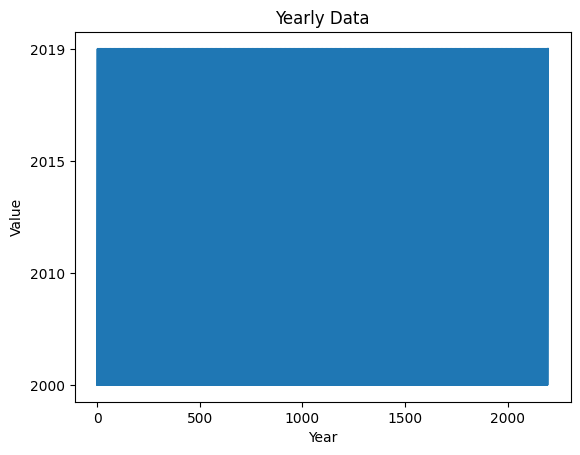

In [63]:
plt.plot(array_year)
plt.title('Yearly Data')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()